In [259]:
import numpy as np 
import pandas as pd 

#data visualization
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Import of data

In [260]:
df = pd.read_csv("C:/Users/aviga/Downloads/dataset/input_bcell.csv")

In [261]:
df.shape

(14387, 14)

In [262]:
df.head(10)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1
5,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,155,159,GLQKV,0.928,0.547,1.090,0.90,6.867493,0.103846,-0.578846,21.684615,1
6,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,22,26,IAKGE,0.888,0.633,0.974,2.66,6.867493,0.103846,-0.578846,21.684615,1
7,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,253,257,RQIKA,0.814,1.252,1.007,2.00,6.867493,0.103846,-0.578846,21.684615,1
8,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,218,222,SSEQV,1.016,1.042,1.055,4.62,6.867493,0.103846,-0.578846,21.684615,1
9,P01012,MGSIGAASMEFCFDVFKELKVHHANENIFYCPIAIMSALAMVYLGA...,261,265,NFEKL,0.900,1.301,0.980,0.42,5.193909,0.085492,-0.001036,37.108575,1


In [263]:
df.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [264]:
df.dtypes

parent_protein_id       object
protein_seq             object
start_position           int64
end_position             int64
peptide_seq             object
chou_fasman            float64
emini                  float64
kolaskar_tongaonkar    float64
parker                 float64
isoelectric_point      float64
aromaticity            float64
hydrophobicity         float64
stability              float64
target                   int64
dtype: object

In [265]:
df.describe(include=['object'])

,parent_protein_id,protein_seq,peptide_seq
count,14387,14387,14387
unique,760,757,14362
top,P10155,MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTY...,ARDVLAVVSK
freq,560,560,3


The features 'parent_protein_id', 'protein_seq', and 'peptide_seq' are of object type. We can either encode or drop them.

In [266]:
del df['parent_protein_id']
del df['protein_seq']
del df['peptide_seq']

In [267]:
df.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
mean,297.675818,308.085077,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902,0.271217
std,353.741450,353.733297,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362,0.444603
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,84.000000,95.000000,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529,0.000000
50%,191.000000,200.000000,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268,0.000000
75%,382.000000,393.000000,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,27.189000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


## Data Visualization

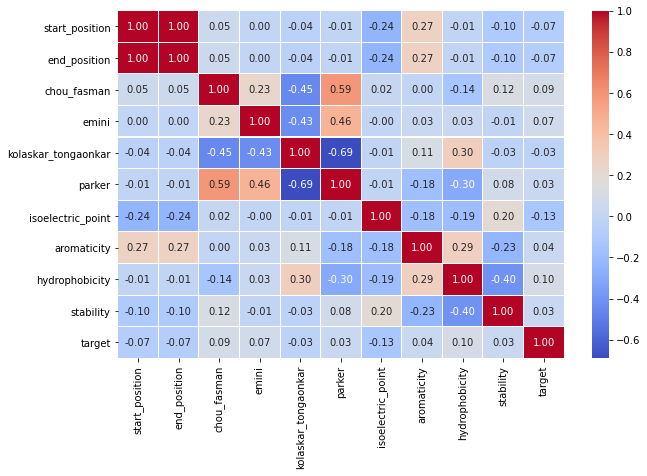

In [268]:
#heatmap to see correlations between features

f, ax = plt.subplots(figsize=(10, 6))
corr = df.iloc[:,0:11].corr()
hm = sb.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)

We can see a strong positive correlation between the varaibles 'start_position' and 'end_position'. We can create a nex variable named 'length', such that length = end_position - start_position.

In [269]:
length = df['end_position']-df['start_position']
df['length'] = length
del df['start_position']
del df['end_position']

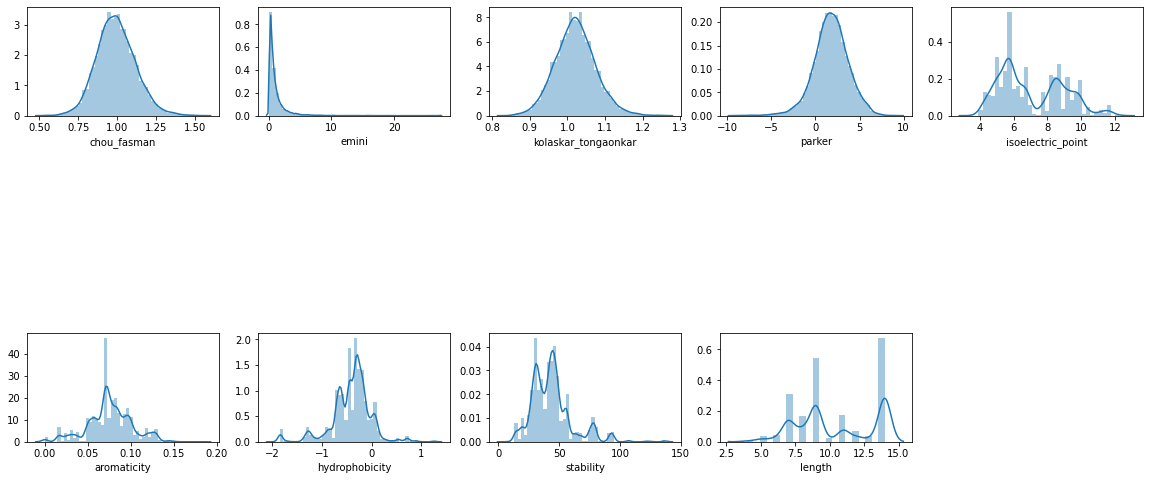

In [270]:
#histograms

features = df[['chou_fasman','emini','kolaskar_tongaonkar','parker','isoelectric_point','aromaticity','hydrophobicity',
               'stability','length']]
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=2.0)
j=1
for feat in features:
    plt.subplot(4,5,j)
    sb.distplot(df[feat])
    j+=1

Let's now plot a distribution of the classes.

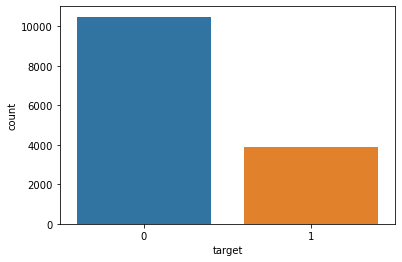

In [271]:
sb.countplot(df['target'])

We can see the dataset is quite unbalanced.

## Preparation of data

In [272]:
sc=MinMaxScaler()
sc.fit_transform(df)
df.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,length
0,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,4
1,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,4
2,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,4
3,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,4
4,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,4


In [273]:
df=shuffle(df)

In [274]:
X = features
y = df['target']

In [275]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, stratify=y,random_state=42)

## (Batch) gradient descent 

In [276]:
X=np.array(X_train)
y=np.array(y_train)

In [277]:
def F(w,X,y): return 1/n * np.sum(np.log( 1 + np.exp(-X.dot(w)*y)))

def theta(v): return 1 / (1+np.exp(-v))
def gradL(s,y): return - 1/n * y * theta(-s * y)
def gradF(w,X,y): return X.transpose().dot( gradL(X.dot(w),y) )

In [278]:
def AddBias(X): return np.hstack(( X, np.ones((np.size(X,0),1)) ))
X=AddBias(X)

In [279]:
n=X.shape[0]
p=X.shape[1]
(n,p) 

(10070, 10)

#### Constant step size

(i.e Maximum step size for convergence : alpha=1/L).

In [282]:
w0 = np.zeros((p,1))
eps=1e-4  #critère d'arrêt ; varier 
L=0.25/n * np.linalg.norm(X, 2)**2
alpha=1/L
alpha

0.0017143372306707896

In [283]:
def gradient_descent_constant(w0,eps,X,y):
    wt=w0
    wt_suiv=wt-alpha*gradF(wt,X,y)
    z=[F(wt,X,y),F(wt_suiv,X,y)] 
    nb_iter=1
    while np.abs(F(wt_suiv,X,y)-F(wt,X,y)) > eps:
        wt=wt_suiv
        wt_suiv=wt-alpha*gradF(wt,X,y)
        z.append(F(wt_suiv,X,y))
        nb_iter+=1
    return(z,nb_iter) 

In [224]:
w0 = np.zeros((p,1))
eps=1e-4
L=np.linalg.norm(X, ord=2) ** 2 / (4. * n)
alpha=1/L
alpha

0.0017232636390809245

In [284]:
z,nb_iter = gradient_descent_constant(w0,eps,X,y)

KeyboardInterrupt: 

In [ ]:
F_theta_star=z[-1]
t=np.arange(nb_iter+1)
z=np.array(z)
value=z
plt.plot(t,value,c='b') 
plt.xlabel('t')
plt.ylabel('objective')
plt.title('Convergence plot') 

### Descent step size

In [232]:
n = 10000 # number of sample
p = 2 # dimensionality
eps=1e-6

omega = np.array([1,.5])*2.5 # offset 
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))
#L=0.25 * np.linalg.norm(X, 2)**2
L=np.linalg.norm(X, ord=2) ** 2 / (4. * n)
alpha=1/L 
w0 = np.zeros((p,1))

In [257]:
def gradient_descent_decr(w0,eps,X,y):
    wt=w0
    alpha=1
    wt_suiv=wt-alpha*gradF(wt,X,y)
    z=[F(wt,X,y),F(wt_suiv,X,y)] 
    nb_iter=1
    while np.abs(F(wt_suiv,X,y)-F(wt,X,y)) > eps:
        wt=wt_suiv
        alpha=1/(nb_iter+1)
        wt_suiv=wt-alpha*gradF(wt,X,y) 
        z.append(F(wt_suiv,X,y))
        nb_iter+=1
    return(z,nb_iter) 

In [258]:
w0 = np.zeros((p,1))
eps=1e-6 
z,nb_iter = gradient_descent_decr(w0,eps,X,y)
nb_iter

2

Text(0.5, 1.0, 'Convergence plot')

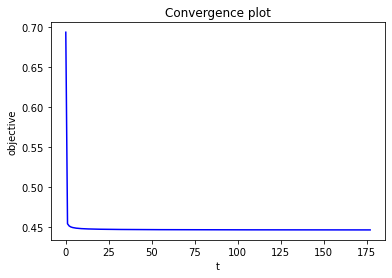

In [229]:
F_theta_star=z[-1]
t=np.arange(nb_iter+1)
z=np.array(z)
value=z
plt.plot(t,value,c='b') 
plt.xlabel('t')
plt.ylabel('objective')
plt.title('Convergence plot')

Text(0.5, 1.0, 'Convergence plot')

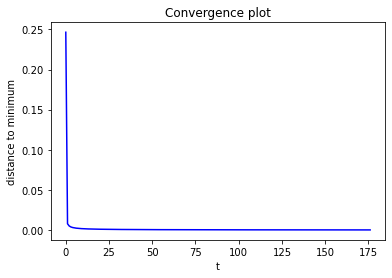

In [231]:
F_theta_star=z[-1]
t=np.arange(nb_iter)
z=np.array(z)
value=z[:(len(z)-1)]-F_theta_star*np.ones(len(z)-1)
plt.plot(value,c='b') 
#plt.semilogy(value)
plt.xlabel('t')
plt.ylabel('distance to minimum')
plt.title('Convergence plot') 

In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
#accurcay on test set
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7067407922168172

In [286]:
#accurcay on train set
y_pred = clf.predict(X_train) 
accuracy_score(y_train, y_pred)

0.9926514399205562